<style>
/* ===== Simple, stable PDF print — NO page numbering, NO Paged.js needed ===== */
@media print {

  /* Page size & margins */
  @page {
    size: A4;
    margin: 14mm 14mm 18mm 14mm;
  }

  /* Start MAIN content on a new page if you want; remove if not desired */
  .main {
    break-before: page;   /* clean jump from front-matter to main */
  }

  /* Front-matter: use .pagebreak-after on the blocks you want to end the page */
  .pagebreak-after { break-after: page !important; }

  /* Gentle page breaking */
  h1, h2, h3, h4 { break-after: avoid; }
  figure, table, pre, code, .output_wrapper, .jp-OutputArea,
  .figure-block, .table-block, .caption { break-inside: avoid; }

  /* Manual page break utility */
  .pagebreak { break-before: page !important; }

  /* Guard against accidental leading page breaks */
  body > .pagebreak:first-child,
  body > .front-matter:first-child + .pagebreak { display: none !important; }

  /* Hide Jupyter UI in print */
  .jp-CodeCell .jp-Cell-inputWrapper,
  .cell.code_cell .input,
  .jp-InputPrompt, .prompt,
  .jp-Toolbar, .jp-Toolbar-item, .lm-TabBar, .no-print { display: none !important; }

  /* Keep colors/logos; scale images safely */
  body { -webkit-print-color-adjust: exact; print-color-adjust: exact; }
  img  { max-width: 100% !important; height: auto !important; }
}

/* No @page :first hack; no counters; no named page boxes. */
</style>


<!-- COVER (front-matter, no numbering) -->
<div class="front-matter pagebreak-after" style="text-align:center; margin-top:40px;">
  <img src="yrgo.png" alt="Yrgo Logo" style="height:80px; margin-bottom:25px;">
  <h1 style="margin:0; font-size:28pt;">Signals and Sensors ELA24</h1>
  <h2 style="margin:8px 0 25px 0; font-weight:normal; font-size:22pt;">
    Laboratory 1 – Frequency Analysis
  </h2>
  <p style="font-size:12pt; line-height:1.6; margin:20px 0;">
    Author: <b>Niklas Brodén</b><br>
    Supervisor: <b>Erik Jagre</b><br>
    Date of Lab: 2025-09-02<br>
    Date of Report: 2025-09-19
  </p>
  <img src="lab_picture.jpg" alt="Lab Photo"
       style="max-width:75%; margin-top:35px; border:1px solid #ccc;">
</div>

<!-- ABSTRACT (front-matter, no numbering) -->
<div class="front-matter pagebreak-after">
  <h2>Abstract</h2>
  <p>
    This lab studied Fourier analysis of periodic waveforms and the effect of a first-order RC low-pass filter.
    Sawtooth, triangle, and sine signals (1 kHz, 5 Vpp) were generated using both a Keysight oscilloscope AWG and an external RND function generator.
    The signals were analyzed with the oscilloscope FFT (exported in Vrms) and compared with theoretical Fourier coefficients after conversion to dBVrms.
    Results were also expressed in dBc (normalized to the fundamental) to allow easier comparison of spectral shapes.
  </p>
  <p>
    Measurements confirmed the expected harmonic patterns: about 1/n decay for sawtooth, 1/n² decay for triangle (with even orders at the noise floor),
    and only the fundamental for sine. Adding an RC stage with measured values R = 8.14 kΩ and C = 9.853 nF gave a cutoff
    f<sub>c</sub> ≈ 1984 Hz and the predicted −20 dB/decade attenuation of higher harmonics, which produced smoother time-domain signals.
  </p>
  <p>
    Small deviations of a few dB came from FFT windowing (Hann), limited frequency resolution, bin alignment, generator bandwidth/quantization, 
    and component tolerances (including parasitic capacitances). The workflow—oscilloscope FFT plus Python post-processing—proved effective
    for extracting harmonic levels and confirming simple analytical models under realistic conditions.
  </p>
</div>

<!-- TABLE OF CONTENTS (front-matter, no numbering) -->
<div class="front-matter">
  <h2>Table of Contents</h2>
  <ol>
    <li>Introduction</li>
    <li>Theory</li>
    <li>Experiment</li>
    <li>Results
      <ol type="a">
        <li>4.1 Sawtooth</li>
        <li>4.2 Triangle</li>
        <li>4.3 Sine</li>
        <li>4.4 RC Filter</li>
      </ol>
    </li>
    <li>Discussion</li>
    <li>Conclusions</li>
    <li>References</li>
    <li>Appendix A — Figures</li>
    <li>Appendix B — Python Code</li>
  </ol>

  <p><strong>Numbering conventions:</strong></p>
  <ul>
    <li><strong>Figures:</strong> Numbered sequentially (Fig. 1–10) in the main text.</li>
    <li><strong>Tables:</strong> Numbered by section and order of appearance.</li>
  </ul>
</div>

<!-- Start the numbered section later with: <div class="main"> ... </div> -->


<div class="main">

  <!-- Page counter reset + new page starts here -->
  <h2 class="start-main">1. Introduction</h2>

  <p>
    The Fourier series is a basic tool in signal processing and electronics. 
    It represents periodic signals as sums of sinusoids, making it possible 
    to study their behavior in the frequency domain. This is important for 
    understanding bandwidth limits, distortion, and noise.
  </p>

  <p>
    In many systems, such as filters and communication links, 
    frequency-domain models are needed to predict performance. 
    For this reason, Fourier analysis is central in both theory and measurement.
  </p>

  <p>The purpose of this lab is:</p>
  <ul>
    <li>To compare theoretical Fourier spectra of sawtooth, triangle, and sine 
        waves with experimental FFT measurements from an oscilloscope.</li>
    <li>To study how a first-order RC low-pass filter changes the harmonic content 
        of signals and to confirm the expected −20 dB/decade roll-off after the cutoff.</li>
  </ul>

  <p>
    By combining oscilloscope FFT data with Python post-processing, 
    the lab also shows how theoretical Fourier coefficients can be linked 
    to real measurements. Normalization to dBc makes spectral shapes easier 
    to compare, helping to see if models match practical results.
  </p>

</div>


<!-- Starta Theory på ny sida -->
<div class="pagebreak"></div>

## Theory

The Fourier series coefficients used later in the results are listed below. Each equation includes a short label and one-sentence interpretation.

- Eq. (1): Sawtooth harmonics (all harmonics)

  $$A_n = \dfrac{2A}{\pi n},\; n\ge 1$$

  Sawtooth contains all harmonics with amplitudes decreasing approximately as 1/n.

- Eq. (2): Triangle harmonics (odd only)

  $$A_n = \dfrac{8A}{\pi^2 n^2},\; n=1,3,5,\dots$$

  Triangle contains only odd harmonics with amplitudes decreasing approximately as 1/n^2.

- Eq. (3): Sine harmonic content

  $$A_1 = A,\; A_{n>1}=0$$

  An ideal sine contains only the fundamental.

- Eq. (4): RMS and dBV conversion

  $$V_{\mathrm{rms}} = \dfrac{V_{\mathrm{peak}}}{\sqrt{2}},\qquad \mathrm{dBV} = 20\log_{10}\!\left(\dfrac{V_{\mathrm{rms}}}{1\,\mathrm{V}}\right)$$

  These relations convert peak values to RMS and express amplitudes on a dBVrms scale.

- Eq. (5): RC low-pass transfer function and cutoff

  $$|H(f)| = \dfrac{1}{\sqrt{1 + (f/f_c)^2}},\qquad \angle H(f) = -\arctan(f/f_c),\qquad f_c = \dfrac{1}{2\pi RC}$$

  The RC filter attenuates higher frequencies; above the cutoff, magnitude falls with roughly −20 dB/decade.

<div class="keep-with-next nobreak">Sources for formulas and lab guidance: [1]–[3].</div>


In [165]:
# Hide warnings globally (keep output clean)
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning)


# === CORE MATH: Fourier + RC (single source of truth) ===
import numpy as np
import pandas as pd

# ----- Lab constants (edit once here) -----
F0 = 1000.0              # fundamental [Hz]
# Drive level: either set VPP directly OR infer it from a measured fundamental in dBVrms
VPP_SCOPE = 5.0          # Vpp seen on scope time trace (set to your actual)
A_PEAK    = VPP_SCOPE/2  # Vpeak used in Fourier formulas

# Measured RC (use measured everywhere for consistency)
R_MEAS = 8140.0          # Ohm
C_MEAS = 9.853e-9        # F
FC_MEAS = 1.0/(2*np.pi*R_MEAS*C_MEAS)

# ---------- Helpers ----------
def vrms_to_dBVrms(vrms, floor=1e-12):
    v = np.maximum(np.asarray(vrms, float), floor)
    return 20*np.log10(v)

def rc_mag(f, fc=FC_MEAS):
    f = np.asarray(f, float)
    return 1.0/np.sqrt(1.0 + (f/fc)**2)

# ---------- Fourier peak -> Vrms -> dBVrms ----------
def saw_vpk(n, A=A_PEAK):
    n = np.asarray(n, int)
    return 2.0*A/(np.pi*np.maximum(n, 1))                 # all n

def tri_vpk(n, A=A_PEAK):
    n = np.asarray(n, int)
    out = np.zeros_like(n, float)
    odd = (n % 2 == 1)
    out[odd] = 8.0*A/(np.pi**2 * np.maximum(n[odd], 1)**2) # odd only
    return out                                             # even -> 0

def sin_vpk(n, A=A_PEAK):
    n = np.asarray(n, int)
    return (n == 1).astype(float)*A                        # only n=1

def vpk_to_dBVrms(vpk):
    vrms = np.asarray(vpk, float)/np.sqrt(2.0)
    return vrms_to_dBVrms(vrms)

def saw_dBVrms(n, A=A_PEAK): return vpk_to_dBVrms(saw_vpk(n, A))
def tri_dBVrms(n, A=A_PEAK): return vpk_to_dBVrms(tri_vpk(n, A))
def sin_dBVrms(n, A=A_PEAK): return vpk_to_dBVrms(sin_vpk(n, A))

def fourier_dBVrms(waveform, n, A=A_PEAK):
    wf = waveform.lower()
    if wf == 'saw': return saw_dBVrms(n, A)
    if wf == 'tri': return tri_dBVrms(n, A)
    if wf == 'sin': return sin_dBVrms(n, A)
    raise ValueError("waveform must be 'saw'|'tri'|'sin'")

def fourier_times_rc_dBVrms(waveform, n, A=A_PEAK, f0=F0):
    # 20*log10( |Fourier| * |H| ) = dBV_fourier + 20*log10|H|
    return fourier_dBVrms(waveform, n, A) + vrms_to_dBVrms(rc_mag(np.asarray(n)*f0))

# ---------- Utility: harmonics picker from spectrum ----------
def pick_harmonics_from_spectrum(spec_df, f0=F0, n_max=10, col='dBVrms'):
    f = spec_df['freq'].values
    y = spec_df[col].values
    n_all = np.arange(1, n_max+1); targets = n_all*f0
    ok = (targets >= f.min()) & (targets <= f.max())
    n = n_all[ok]; t = targets[ok]
    idx = np.searchsorted(f, t); idx = np.clip(idx, 1, len(f)-1)
    choose = np.where(np.abs(f[idx]-t) < np.abs(f[idx-1]-t), idx, idx-1)
    return pd.DataFrame({'n': n, 'freq_bin': f[choose], col: y[choose]})

# ---------- Optional: infer Vpp from a measured fundamental in dBVrms ----------
def infer_vpp_from_dBV_fund(dBV_fund):
    Vrms = 10**(dBV_fund/20.0)
    Vpk  = Vrms*np.sqrt(2.0)
    return 2.0*Vpk  # Vpp


<div class="pagebreak"></div>

## Experiment

### Equipment
- Keysight DSOX1204G oscilloscope (FFT function and built-in AWG)  
- RND Lab Function Generator, RND 360-00002 (500 MSa/s, 14-bit, 35 MHz) [8][9]  
- Resistor: nominal 8.2 kΩ, measured 8.140 kΩ (Fluke 155)  
- Capacitor: nominal 10 nF, measured 9.853 nF (Agilent U1731C)  
- Multimeter: Fluke 155  
- LCR meter: Agilent U1731C  
- Software: Python (NumPy, Pandas, Matplotlib)  

### Procedure
1. Set the sources to 1 kHz, 5 Vpp. Select sawtooth, triangle, and sine waveforms.  
   - Signals were taken from both the Keysight AWG and the external RND generator.  
2. Record FFT spectra with about 20,000 points per trace for good frequency resolution.  
3. Export FFT data using Keysight BenchVue [7]. The oscilloscope FFT gives amplitudes in **Vrms** (with a Hann window [6]); these were converted to **dBVrms** in Python.  
4. Extract harmonics \(n = 1…10\) at multiples of 1 kHz.  
5. Compare measured spectra with theoretical Fourier coefficients. For the RC case, apply \(|H(f)|\).  
6. Capture time-domain screenshots of input and RC-filtered signals.  

*Note:* Results are given in **dBVrms** (absolute, ref. 1 Vrms) and **dBc** (relative to the fundamental). Using dBc removes scaling differences between sources and highlights harmonic decay compared with theory.  

### Calculations and Validation
Two quick calculations were made before analyzing the spectra:

1. **RC cutoff frequency**  
   Using the measured values:  

   $$
   f_c = \frac{1}{2\pi RC} \approx 1984~\text{Hz}, 
   \quad R = 8140~\Omega,\; C = 9.853~\text{nF}.
   $$  

2. **Fourier coefficients**  
   Harmonic amplitudes for sawtooth and triangle waves were calculated both manually and with Python. The results agreed within a few hundredths of a decibel. These tiny differences come from rounding of decimals in manual calculations and limited precision in logarithmic conversions. Agreement within this small range confirms that the Python implementation of Fourier coefficients was correct.


In [166]:
# Compute cutoff using measured R and C values (for reference)
import numpy as np
R_meas = 8140.0        # ohms (Fluke 155)
C_meas = 9.853e-9      # farads (Agilent U1731C)
fc_meas = 1.0/(2*np.pi*R_meas*C_meas)

In [167]:
# Read manual calculations CSV (Swedish locale) and compare with Python theory — uses TOP MATH CELL
import pandas as pd, numpy as np
from IPython.display import display, HTML

# ---- Input file ----
manual_csv = 'Handberäkningar Frekvensanalys - Blad3.csv'

# ---- Robust CSV read: handles decimal comma, stray spaces, unicode minus ----
raw = pd.read_csv(manual_csv, sep=',', header=0, dtype=str, engine='python')
raw = raw.applymap(lambda s: s.strip() if isinstance(s, str) else s)
raw = raw.replace({'−': '-'}, regex=True)               # normalize unicode minus
for col in raw.columns:                                 # decimal comma -> dot
    if raw[col].dtype == object:
        raw[col] = raw[col].str.replace(',', '.', regex=False)

# ---- Header mapping (tolerant to trailing spaces/variants) ----
cols_map = {
    'n (n kHz)': 'n',
    'Sågtandsvåg (dBVrms, teoretiska)': 'saw_dBV_manual',
    'Triangelvåg (dBVrms, teoretiska)': 'tri_dBV_manual',
    'Sågtandsvåg i RC-filter (Dämpning absolutbelopp)': 'rc_mag_manual',
    'Sågtandsvåg i RC-filter (dämpning i dB jämfört med magnitud, teoretiska)': 'rc_dB_manual',
}
rename = {}
for c in raw.columns:
    for k, v in cols_map.items():
        if c and c.strip().startswith(k.strip()):
            rename[c] = v
            break

need = list(cols_map.values())
manual = raw.rename(columns=rename)
missing = [c for c in need if c not in manual.columns]
if missing:
    raise ValueError(f"Missing expected columns in CSV: {missing}\nFound: {list(manual.columns)}")

manual = manual[need].copy()
for c in manual.columns:
    manual[c] = pd.to_numeric(manual[c], errors='coerce')
manual = manual.dropna(subset=['n']).astype({'n': int}).reset_index(drop=True)

# ---- Python theory using the SHARED MATH CELL (assumed defined): F0, vrms_to_dBVrms(), rc_mag(), fourier_dBVrms() ----
calc = manual[['n']].copy()
calc['saw_dBV_python'] = fourier_dBVrms('saw', calc['n'].values)
calc['tri_dBV_python'] = fourier_dBVrms('tri', calc['n'].values)
calc['rc_mag_python']  = rc_mag(calc['n'].values * F0)
calc['rc_dB_python']   = vrms_to_dBVrms(calc['rc_mag_python'].values)

# ---- Merge & deltas ----
cmp = manual.merge(calc, on='n', how='left')
cmp['Δ_saw_dB'] = cmp['saw_dBV_python'] - cmp['saw_dBV_manual']
cmp['Δ_tri_dB'] = cmp['tri_dBV_python'] - cmp['tri_dBV_manual']
cmp['Δ_rc_mag'] = cmp['rc_mag_python']  - cmp['rc_mag_manual']
cmp['Δ_rc_dB']  = cmp['rc_dB_python']   - cmp['rc_dB_manual']

# ---- Formats ----
fmt = {
    'saw_dBV_manual': '{:.2f}', 'saw_dBV_python': '{:.2f}', 'Δ_saw_dB': '{:+.2f}',
    'tri_dBV_manual': '{:.2f}', 'tri_dBV_python': '{:.2f}', 'Δ_tri_dB': '{:+.2f}',
    'rc_mag_manual': '{:.2f}',  'rc_mag_python': '{:.2f}',  'Δ_rc_mag': '{:+.2f}',
    'rc_dB_manual': '{:.2f}',   'rc_dB_python': '{:.2f}',   'Δ_rc_dB': '{:+.2f}',
}

# ======================
# Table 1a — Fourier
# ======================
cols_a = [
    'n',
    'saw_dBV_manual','saw_dBV_python','Δ_saw_dB',
    'tri_dBV_manual','tri_dBV_python','Δ_tri_dB',
]
display(HTML("<div class='figure-note keep-with-next nobreak'>Manual vs Python (Fourier). Agreement within rounding confirms correct implementation.</div>"))
display(HTML("<div class='caption' style='font-weight:600'>Table 1a. Manual vs Python — Fourier coefficients (dBVrms)</div>"))
try:
    display(cmp[cols_a].round(2))
except Exception:
    display(cmp[cols_a].style.format(fmt))

# Optional page break if the two tables risk colliding in print:
display(HTML("<div class='pagebreak'></div>"))

# ======================
# Table 1b — RC
# ======================
cols_b = [
    'n',
    'rc_mag_manual','rc_mag_python','Δ_rc_mag',
    'rc_dB_manual','rc_dB_python','Δ_rc_dB',
]
display(HTML("<div class='figure-note keep-with-next nobreak'>Manual vs Python (RC). Agreement within rounding confirms correct implementation.</div>"))
display(HTML("<div class='caption' style='font-weight:600'>Table 1b. Manual vs Python — RC magnitude and dB</div>"))
try:
    display(cmp[cols_b].round(2))
except Exception:
    display(cmp[cols_b].style.format(fmt))


,n,saw_dBV_manual,saw_dBV_python,Δ_saw_dB,tri_dBV_manual,tri_dBV_python,Δ_tri_dB
0,1,1.02,1.03,0.01,3.12,3.12,0.00
1,2,-4.95,-4.99,-0.05,0.00,-240.00,-240.00
2,3,-8.52,-8.52,0.01,-16.00,-15.96,0.04
3,4,-10.97,-11.02,-0.05,0.00,-240.00,-240.00
4,5,-12.91,-12.95,-0.05,-24.84,-24.83,0.01
5,6,-13.38,-14.54,-1.15,0.00,-240.00,-240.00
6,7,-15.78,-15.88,-0.10,-30.76,-30.68,0.08
7,8,-17.00,-17.04,-0.04,0.00,-240.00,-240.00
8,9,-18.00,-18.06,-0.06,-35.05,-35.05,0.01
9,10,-18.93,-18.97,-0.05,0.00,-240.00,-240.00


,n,rc_mag_manual,rc_mag_python,Δ_rc_mag,rc_dB_manual,rc_dB_python,Δ_rc_dB
0,1,0.89,0.89,0.00,-1.01,-0.98,0.03
1,2,0.70,0.70,0.00,-3.10,-3.04,0.06
2,3,0.54,0.55,0.01,-5.35,-5.17,0.18
3,4,0.44,0.44,0.00,-7.13,-7.04,0.09
4,5,0.36,0.37,0.01,-8.83,-8.66,0.17
5,6,0.31,0.31,0.00,-10.17,-10.06,0.11
6,7,0.27,0.27,0.00,-11.37,-11.29,0.08
7,8,0.24,0.24,0.00,-12.40,-12.37,0.03
8,9,0.21,0.22,0.01,-13.55,-13.34,0.21
9,10,0.19,0.19,0.00,-14.42,-14.22,0.20


<div class="pagebreak"></div>

## Results

The results are divided into four parts. Each part has harmonic tables, plots, and short notes compared with theory. Figures and tables are numbered in order.

### Note on absolute scaling (dBVrms)
Some absolute FFT levels in the exported CSV files were **too high to be real** for a 5 Vpp signal. For example, one sawtooth fundamental was shown as about +20.9 dBVrms, which equals 11 Vrms. This is impossible, since the maximum for 5 Vpp sine is about +4.95 dBVrms. The problem came from how the oscilloscope saved the data (different CSV format, decimal comma/point, or wrong column taken).  

Because of this, the absolute dBVrms numbers cannot always be trusted. To handle this, the report shows both **dBVrms** (absolute values) and **dBc** (each trace normalized to its own fundamental). All main comparisons and interpretations are based on **dBc**, which are not affected by scaling errors. In the tables, values below the noise floor or undefined are written as “—” instead of a false number like −240 dB.  

Reference values for a 5 Vpp input are:  
- Sine n=1 ≈ +4.95 dBVrms  
- Sawtooth n=1 ≈ +1.03 dBVrms  
- Triangle n=1 ≈ +3.12 dBVrms  

Numbers very different from these should be seen as CSV/scale errors, not real signal levels.

---

### 4.1 Sawtooth — Theory vs Keysight vs RND Lab
The first ten harmonics (n = 1…10) were measured and compared with theory.

- **Tables 2a–2b:** Amplitudes in dBVrms and normalized dBc.  
- **Fig. 1:** Overlay of theory, Keysight, and RND Lab.  
- **Interpretation:** All harmonics appear, decaying close to the \(1/n\) slope. RND Lab keeps stronger higher harmonics, while Keysight rolls off earlier.

### 4.2 Triangle — Theory vs Keysight vs RND Lab
Theory predicts only odd harmonics with \(1/n^2\) decay.

- **Tables 3a–3b:** Odd harmonics in dBVrms and dBc.  
- **Fig. 2:** Overlay of theory, Keysight, and RND Lab.  
- **Interpretation:** Odd harmonics follow \(1/n^2\). Even harmonics stay near the noise floor. RND Lab matches theory well; Keysight shows slightly stronger damping of higher orders.

### 4.3 Sine — Theory vs Keysight vs RND Lab
An ideal sine has only the fundamental.

- **Tables 4a–4b:** Fundamental vs theory; higher orders near noise floor.  
- **Fig. 3:** Overlay of both sources.  
- **Interpretation:** Both sources reproduce the fundamental. Harmonics above n = 1 are below −50 dBc, explained by FFT leakage and small imperfections.

### 4.4 RC Filter
The RC low-pass filter results are collected here.

- **Tables 5a–5b:** Input vs output spectra for Keysight and RND Lab, with theory.  
- **Figs. 4a–4b:** Four-trace overlays in dBVrms and dBc.  
- **Figs. 5–7:** FFT spectra at 1 kHz, 10 kHz, 100 kHz, showing roll-off.  
- **Figs. 8–10:** Time-domain plots at the same frequencies, showing smoother outputs.  
- **Interpretation:** The cutoff near 2 kHz matches calculation. Harmonic attenuation follows −20 dB/decade, and waveforms show expected smoothing. Small differences come from component tolerances, parasitics, FFT limits, and the Hann window.


In [168]:
# === ELA24: Comparisons in dBVrms (no files written) — uses TOP MATH CELL ===
# Uses shared helpers defined earlier in the notebook:
#   F0, A_PEAK, vrms_to_dBVrms(), rc_mag(), fourier_dBVrms(),
#   fourier_times_rc_dBVrms(), pick_harmonics_from_spectrum()

import numpy as np, pandas as pd, matplotlib.pyplot as plt
from pathlib import Path
from IPython.display import HTML, display, Image

plt.rcParams['figure.dpi'] = 120
plt.rcParams['figure.figsize'] = (5.2, 3.2)

# ----- Local params -----
N_HARM = 10          # compare first N harmonics
DB_FLOOR_HIDE = -200 # anything below this is shown as "—" in tables

# Expected dBVrms of the fundamental (n=1) for 5 Vpp input (A=2.5 Vpeak)
EXPECTED_FUND_DBV = {"sin": 4.95, "saw": 1.03, "tri": 3.12}

# =============================== I/O + HARMONIC PICKER ===============================

def _is_number_like(s: str) -> bool:
    """Fast check for numbers with either decimal comma or point."""
    t = s.strip().replace(',', '.')
    if not t: return False
    if t.startswith('-'): t = t[1:]
    return t.replace('.', '', 1).isdigit()

def read_scope_fft_vrms(csv_path, floor_vrms=1e-12):
    """
    Robust CSV reader for Keysight/RND FFT exports.

    - Accepts semicolon CSV with decimal comma or point.
    - Scans each row for plausible (freq, Vrms) pairs instead of assuming "last two columns".
    - Frequency range filter: 1 Hz .. 100 MHz
    - Vrms range filter: 0 .. 100 V
    - Auto-rescales freq from kHz->Hz if needed.
    - Converts Vrms -> dBVrms
    Returns DataFrame with columns: ['freq','dBVrms'].
    """
    raw = pd.read_csv(
        Path(csv_path),
        sep=';',
        header=None,
        engine='python',
        dtype=str,
        on_bad_lines='skip'
    )

    pairs = []
    for _, row in raw.iterrows():
        # Parse all numeric-looking cells on this row
        nums = []
        for cell in row.dropna():
            s = str(cell)
            if _is_number_like(s):
                nums.append(float(s.strip().replace(',', '.')))
        # Try every adjacent pair as (f, Vrms)
        for i in range(len(nums) - 1):
            f, v = nums[i], nums[i + 1]
            if 1.0 <= f <= 1e8 and 0.0 <= v <= 100.0:
                pairs.append((f, v))

    if not pairs:
        raise ValueError(f"No plausible (freq, Vrms) pairs found in {csv_path}")

    df = (pd.DataFrame(pairs, columns=['freq', 'Vrms'])
            .sort_values('freq')
            .drop_duplicates('freq')
            .reset_index(drop=True))

    # --- Auto-rescale if frequency looks like kHz instead of Hz ---
    need_up_to = float(N_HARM) * float(F0)
    fmax = float(df['freq'].max()) if len(df) else 0.0
    if 0.0 < fmax < 0.5 * need_up_to and (fmax * 1000.0) >= 0.5 * need_up_to:
        df['freq'] = df['freq'] * 1000.0
        print(f"[INFO] {csv_path}: frequency column looked like kHz; scaled to Hz.")

    df['dBVrms'] = vrms_to_dBVrms(np.maximum(df['Vrms'].values, floor_vrms))
    return df[['freq', 'dBVrms']]

def _warn_if_span_too_low(df_spec, label):
    """Warn if spectrum does not reach N_HARM * F0."""
    try:
        fmax = float(df_spec['freq'].max())
    except Exception:
        fmax = 0.0
    need_up_to = float(N_HARM) * float(F0)
    if fmax < need_up_to:
        print(f"[WARN] {label}: spectrum ends at {fmax:.1f} Hz, "
              f"but N_HARM={N_HARM} at f0={F0:.1f} Hz needs ≥ {need_up_to:.1f} Hz. "
              "Higher harmonics will be missing (shown as “—”).")

def _pick_harmonics_nearest(spec_df, n_max=N_HARM, col='dBVrms'):
    """Nearest-bin fallback picker: for each n*F0, pick the closest frequency sample."""
    freqs = spec_df['freq'].to_numpy()
    vals  = spec_df[col].to_numpy()
    targets = np.arange(1, n_max+1, dtype=float) * float(F0)
    idx = np.abs(freqs.reshape(-1,1) - targets.reshape(1,-1)).argmin(axis=0)
    picked = pd.DataFrame({
        'n': np.arange(1, n_max+1, dtype=int),
        col: vals[idx]
    })
    return picked

def pick_harmonics(spec_df, n_max=N_HARM, col='dBVrms'):
    """
    Wrap the shared helper; if not present or coverage looks sparse,
    fall back to nearest-bin selection.
    """
    # Try shared helper first (if defined)
    try:
        df = pick_harmonics_from_spectrum(spec_df, f0=F0, n_max=n_max, col=col)
        # If it doesn't cover enough harmonics (e.g., due to tight tolerance), use fallback
        if not isinstance(df, pd.DataFrame) or df.empty or df['n'].nunique() < min(3, n_max):
            raise RuntimeError("helper returned sparse coverage; using nearest fallback")
        # Ensure n is 1..n_max; if not, also fallback
        if set(df['n'].unique()) != set(range(1, n_max+1)):
            # Try to rebuild with nearest for missing n and merge
            df_near = _pick_harmonics_nearest(spec_df, n_max=n_max, col=col)
            df = pd.merge(df_near, df[['n', col]], on='n', how='left', suffixes=('_near', ''))
            df[col] = df[col].fillna(df[f'{col}_near'])
            df = df[['n', col]]
        return df
    except Exception:
        return _pick_harmonics_nearest(spec_df, n_max=n_max, col=col)

# =============================== UTILITIES (NOTES, dBc, CAPTION) ===============================

def to_dBc(n_series, dBV_series):
    """
    Convert dBVrms to dBc by subtracting the fundamental (n=1) of the same trace.
    If n=1 is missing, use the max value as a fallback reference.
    """
    n = np.asarray(n_series)
    y = np.asarray(dBV_series, float)
    ref = y[n.tolist().index(1)] if 1 in n else np.nanmax(y)
    return y - ref

def note_theory_vs_meas(waveform, apply_rc=False):
    """Short plain-English notes under each figure."""
    wf = waveform.lower()
    if wf == 'saw':
        trend = "All harmonics present; amplitudes decay ~1/n."
    elif wf == 'tri':
        trend = "Odd harmonics only; amplitudes decay ~1/n^2."
    elif wf == 'sin':
        trend = "Ideally only the fundamental; higher orders near leakage/noise."
    else:
        trend = ""
    rc = " The RC filter reduces higher harmonics more strongly." if apply_rc else ""
    display(HTML(f"<div class='figure-note'>Interpretation: {trend}{rc}</div>"))

def caption(text):
    display(HTML(f"<div class='caption'>{text}</div>"))

def _format_table_for_display(df_numeric):
    """
    Replace extreme/undefined values with '—' for clean tables.
    - Any value < DB_FLOOR_HIDE is shown as '—'
    - NaN stays '—'
    Returns a string-typed DataFrame for display.
    """
    def fmt_val(x):
        if pd.isna(x): return "—"
        try:
            if x < DB_FLOOR_HIDE: return "—"
            return f"{x:.2f}"
        except Exception:
            return str(x)
    return df_numeric.applymap(fmt_val)

# =============================== TABLE RENDERERS (AUTO-DETECT VARIANT) ===============================

def show_case_table_abs(df, caption_text, preface_text=None, closing_text=None):
    """
    Shows absolute amplitudes in dBVrms.
    Auto-detects columns:
      Single: ['n','theory_dBVrms','meas_dBVrms','err_dB']
      Dual:   ['n','theory_dBVrms','k_dBVrms','r_dBVrms','k_err_dB','r_err_dB']
    Values below floor are shown as '—'. Add a footnote in your report that
    '—' = not measurable / below noise / not defined.
    """
    if {'k_dBVrms','r_dBVrms','k_err_dB','r_err_dB'}.issubset(df.columns):
        cols = ['n','theory_dBVrms','k_dBVrms','r_dBVrms','k_err_dB','r_err_dB']
    else:
        cols = ['n','theory_dBVrms','meas_dBVrms','err_dB']

    if preface_text: display(HTML(f"<div>{preface_text}</div>"))
    caption(caption_text)

    show = df[cols].copy()
    # Round numeric first, then format to "—" as needed
    for c in show.columns:
        if c != 'n' and np.issubdtype(show[c].dtype, np.number):
            show[c] = show[c].round(2)
    show = show.sort_values('n').reset_index(drop=True)
    display(_format_table_for_display(show))

    if closing_text: display(HTML(f"<div class='figure-note'>{closing_text}</div>"))

def show_case_table_rel(df, caption_text, preface_text=None, closing_text=None):
    """
    Shows normalized amplitudes in dBc (each trace normalized to its own n=1).
    Auto-detects columns:
      Single: ['n','theory_dBc','meas_dBc','err_dBc']
      Dual:   ['n','theory_dBc','k_dBc','r_dBc','k_err_dBc','r_err_dBc']
    """
    if {'k_dBc','r_dBc','k_err_dBc','r_err_dBc'}.issubset(df.columns):
        cols = ['n','theory_dBc','k_dBc','r_dBc','k_err_dBc','r_err_dBc']
    else:
        cols = ['n','theory_dBc','meas_dBc','err_dBc']

    if preface_text: display(HTML(f"<div>{preface_text}</div>"))
    caption(caption_text)

    show = df[cols].copy()
    for c in show.columns:
        if c != 'n' and np.issubdtype(show[c].dtype, np.number):
            show[c] = show[c].round(2)
    show = show.sort_values('n').reset_index(drop=True)
    display(_format_table_for_display(show))

    if closing_text: display(HTML(f"<div class='figure-note'>{closing_text}</div>"))

# =============================== THEORY SERIES ===============================

def theory_df(waveform, apply_rc=False, n_max=N_HARM):
    """Return theory series for chosen waveform, optionally passed through |H(jω)| of RC."""
    n = np.arange(1, n_max+1)
    if apply_rc:
        dB = fourier_times_rc_dBVrms(waveform, n, A=A_PEAK, f0=F0)  # |Fourier| × |H|
    else:
        dB = fourier_dBVrms(waveform, n, A=A_PEAK)
    out = pd.DataFrame({'n': n, 'f_Hz': n*F0, 'theory_dBVrms': dB})
    out['theory_dBc'] = to_dBc(out['n'], out['theory_dBVrms'])
    return out

# =============================== SANITY CHECKS ===============================

def sanity_check_fundamental(df_harm, wave, cols=('meas_dBVrms','k_dBVrms','r_dBVrms'), tol_db=8.0):
    """
    Warn if the measured fundamental (n=1) is far from the expected value.
    This catches bad CSV scaling (decimal issues, wrong column, etc.).
    """
    exp = EXPECTED_FUND_DBV.get(wave.lower())
    if exp is None:
        return
    row1 = df_harm[df_harm['n'] == 1]
    if row1.empty:
        print(f"[WARN] Fundamental n=1 not found for {wave}.")
        return
    for c in cols:
        if c in row1.columns:
            try:
                meas = float(row1.iloc[0][c])
                if np.isfinite(meas) and abs(meas - exp) > tol_db:
                    print(f"[WARN] {wave} n=1 looks off in '{c}': measured {meas:.2f} dBVrms, expected ~{exp:.2f} dBVrms. "
                          "Check CSV columns / decimal separators / window scaling. Use dBc for conclusions.")
            except Exception:
                pass

# =============================== TWO-PANEL (Theory + ONE measurement) ===============================

def compare_two_panel(csv_path, waveform, apply_rc_to_theory=False, title_prefix=None):
    """
    Single-measurement figure: Theory vs Measurement.
    Also runs a simple sanity check on the fundamental (n=1).
    """
    spec = read_scope_fft_vrms(csv_path)  # robust Vrms -> dBVrms
    _warn_if_span_too_low(spec, f"INPUT {csv_path}")

    meas = pick_harmonics(spec, n_max=N_HARM, col='dBVrms').rename(columns={'dBVrms':'meas_dBVrms'})
    theo = theory_df(waveform, apply_rc=apply_rc_to_theory, n_max=N_HARM)

    df = meas.merge(theo[['n','theory_dBVrms','theory_dBc']], on='n', how='left')
    df['err_dB']   = df['meas_dBVrms'] - df['theory_dBVrms']
    df['meas_dBc'] = to_dBc(df['n'], df['meas_dBVrms'])
    df['err_dBc']  = df['meas_dBc']   - df['theory_dBc']

    # Sanity check for n=1
    sanity_check_fundamental(df, waveform, cols=('meas_dBVrms',))

    # Plot (two panels)
    fig, axes = plt.subplots(1, 2, figsize=(9.8, 3.4))

    # Absolute
    ax = axes[0]
    ax.stem(df['n'], df['theory_dBVrms'], linefmt='C0-', markerfmt='C0o', basefmt=' ', label='Theory (dBVrms)')
    ax.stem(df['n']+0.08, df['meas_dBVrms'], linefmt='C1-', markerfmt='C1s', basefmt=' ', label='Measurement (dBVrms)')
    ax.set_xlabel('Harmonic n'); ax.set_ylabel('dBVrms'); ax.set_title('Absolute (dBVrms)'); ax.grid(alpha=0.35)
    ax.legend(fontsize=8)

    # Normalized
    ax2 = axes[1]
    ax2.stem(df['n'], df['theory_dBc'], linefmt='C0-', markerfmt='C0o', basefmt=' ', label='Theory (dBc)')
    ax2.stem(df['n']+0.08, df['meas_dBc'], linefmt='C1-', markerfmt='C1s', basefmt=' ', label='Measurement (dBc)')
    ax2.set_xlabel('Harmonic n'); ax2.set_ylabel('dBc (rel. to n=1)'); ax2.set_title('Normalized (dBc)'); ax2.grid(alpha=0.35)

    fig.tight_layout()
    ttl = (title_prefix or "FFT") + (" — after RC" if apply_rc_to_theory else " — input")
    plt.show()
    caption(f"{ttl}. Measured with Keysight oscilloscope FFT; CSV amplitudes were Vrms and converted to dBVrms here.")

    return df

# =============================== THREE-PANEL (Theory + Keysight + RND Lab) ===============================

def compare_three_panel(csv_keysight, csv_rnd, waveform, apply_rc_to_theory=False, title_prefix=None):
    """
    Multi-trace figure: Theory + Keysight + RND Lab in the same two-panel plot (dBVrms & dBc).
    Also runs a sanity check on the fundamental (n=1) for each source.
    """
    # Read/convert both spectra
    spec_k = read_scope_fft_vrms(csv_keysight)
    spec_r = read_scope_fft_vrms(csv_rnd)

    _warn_if_span_too_low(spec_k, f"INPUT {csv_keysight}")
    _warn_if_span_too_low(spec_r, f"INPUT {csv_rnd}")

    meas_k = pick_harmonics(spec_k, n_max=N_HARM, col='dBVrms').rename(columns={'dBVrms':'k_dBVrms'})
    meas_r = pick_harmonics(spec_r, n_max=N_HARM, col='dBVrms').rename(columns={'dBVrms':'r_dBVrms'})
    theo   = theory_df(waveform, apply_rc=apply_rc_to_theory, n_max=N_HARM)[['n','theory_dBVrms','theory_dBc']]

    # Merge & compute errors + dBc
    df = theo.merge(meas_k, on='n', how='left').merge(meas_r, on='n', how='left')
    df['k_err_dB'] = df['k_dBVrms'] - df['theory_dBVrms']
    df['r_err_dB'] = df['r_dBVrms'] - df['theory_dBVrms']
    df['k_dBc'] = to_dBc(df['n'], df['k_dBVrms'])
    df['r_dBc'] = to_dBc(df['n'], df['r_dBVrms'])
    df['k_err_dBc'] = df['k_dBc'] - df['theory_dBc']
    df['r_err_dBc'] = df['r_dBc'] - df['theory_dBc']

    # Sanity checks for n=1
    sanity_check_fundamental(df.rename(columns={'k_dBVrms':'meas_dBVrms'}), waveform, cols=('meas_dBVrms',))
    sanity_check_fundamental(df.rename(columns={'r_dBVrms':'meas_dBVrms'}), waveform, cols=('meas_dBVrms',))

    # Plot (two panels): Absolute dBVrms + Normalized dBc
    fig, axes = plt.subplots(1, 2, figsize=(9.8, 3.4))

    # Absolute
    ax = axes[0]
    ax.stem(df['n'],        df['theory_dBVrms'], linefmt='C0-', markerfmt='C0o', basefmt=' ', label='Theory (dBVrms)')
    ax.stem(df['n']+0.08,   df['k_dBVrms'],      linefmt='C1-', markerfmt='C1s', basefmt=' ', label='Keysight (dBVrms)')
    ax.stem(df['n']+0.16,   df['r_dBVrms'],      linefmt='C2-', markerfmt='C2^', basefmt=' ', label='RND Lab (dBVrms)')
    ax.set_xlabel('Harmonic n'); ax.set_ylabel('dBVrms'); ax.set_title('Absolute (dBVrms)'); ax.grid(alpha=0.35)
    ax.legend(fontsize=8)

    # Normalized
    ax2 = axes[1]
    ax2.stem(df['n'],       df['theory_dBc'], linefmt='C0-', markerfmt='C0o', basefmt=' ', label='Theory (dBc)')
    ax2.stem(df['n']+0.08,  df['k_dBc'],      linefmt='C1-', markerfmt='C1s', basefmt=' ', label='Keysight (dBc)')
    ax2.stem(df['n']+0.16,  df['r_dBc'],      linefmt='C2-', markerfmt='C2^', basefmt=' ', label='RND Lab (dBc)')
    ax2.set_xlabel('Harmonic n'); ax2.set_ylabel('dBc (rel. to n=1)'); ax2.set_title('Normalized (dBc)'); ax2.grid(alpha=0.35)
    ax2.legend(fontsize=8)

    fig.tight_layout()
    ttl = (title_prefix or "FFT") + (" — after RC" if apply_rc_to_theory else " — input")
    plt.show()
    caption(f"{ttl}. Theory vs Keysight vs RND Lab; CSV amplitudes were Vrms and converted to dBVrms here.")

    return df


[WARN] saw n=1 looks off in 'meas_dBVrms': measured 20.89 dBVrms, expected ~1.03 dBVrms. Check CSV columns / decimal separators / window scaling. Use dBc for conclusions.


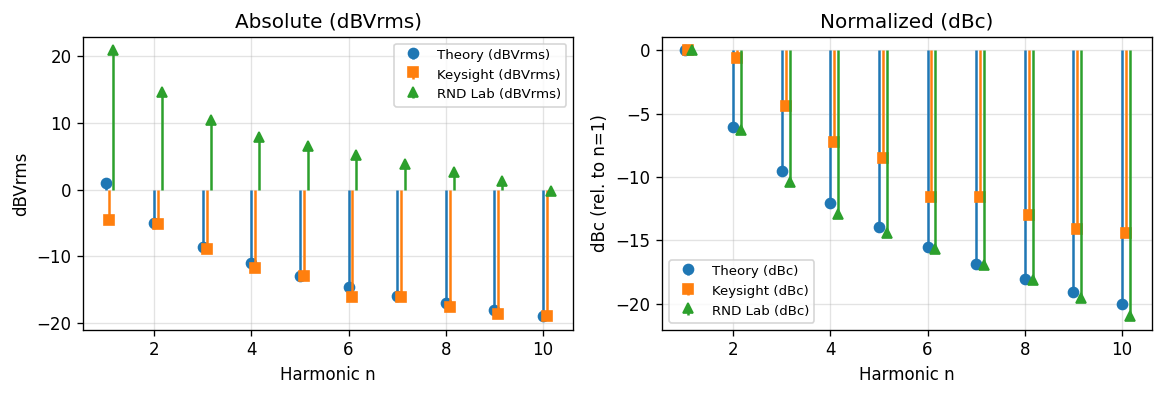

,n,theory_dBVrms,k_dBVrms,r_dBVrms,k_err_dB,r_err_dB
0,1.00,1.03,-4.48,20.89,-5.51,19.87
1,2.00,-4.99,-5.12,14.59,-0.13,19.58
2,3.00,-8.52,-8.85,10.47,-0.33,18.99
3,4.00,-11.02,-11.71,7.96,-0.69,18.97
4,5.00,-12.95,-12.99,6.48,-0.03,19.44
5,6.00,-14.54,-16.04,5.23,-1.50,19.77
6,7.00,-15.88,-16.07,3.93,-0.19,19.81
7,8.00,-17.04,-17.51,2.72,-0.47,19.75
8,9.00,-18.06,-18.61,1.30,-0.55,19.36
9,10.00,-18.97,-18.93,-0.12,0.04,18.85


,n,theory_dBc,k_dBc,r_dBc,k_err_dBc,r_err_dBc
0,1.00,0.00,0.00,0.00,0.00,0.00
1,2.00,-6.02,-0.64,-6.31,5.38,-0.29
2,3.00,-9.54,-4.36,-10.42,5.18,-0.88
3,4.00,-12.04,-7.23,-12.94,4.82,-0.89
4,5.00,-13.98,-8.50,-14.41,5.48,-0.43
5,6.00,-15.56,-11.55,-15.66,4.01,-0.10
6,7.00,-16.90,-11.59,-16.96,5.31,-0.06
7,8.00,-18.06,-13.03,-18.18,5.03,-0.12
8,9.00,-19.08,-14.13,-19.59,4.96,-0.50
9,10.00,-20.00,-14.45,-21.01,5.55,-1.01


[WARN] tri n=1 looks off in 'meas_dBVrms': measured 22.99 dBVrms, expected ~3.12 dBVrms. Check CSV columns / decimal separators / window scaling. Use dBc for conclusions.


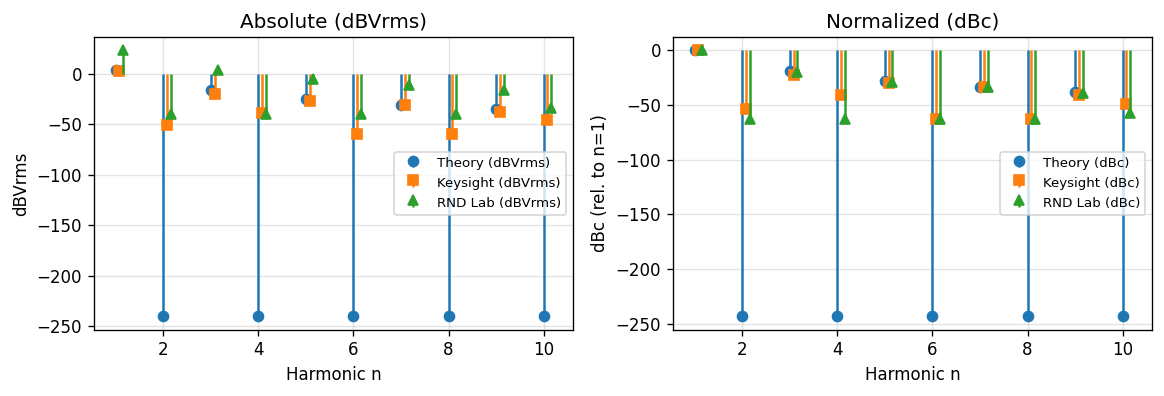

,n,theory_dBVrms,k_dBVrms,r_dBVrms,k_err_dB,r_err_dB
0,1.00,3.12,2.64,22.99,-0.48,19.86
1,2.00,—,-50.66,-40.21,189.34,199.79
2,3.00,-15.96,-20.03,3.14,-4.07,19.10
3,4.00,—,-38.62,-40.21,201.38,199.79
4,5.00,-24.83,-26.95,-5.72,-2.12,19.11
5,6.00,—,-60.21,-40.21,179.79,199.79
6,7.00,-30.68,-30.66,-10.96,0.02,19.72
7,8.00,—,-60.21,-40.21,179.79,199.79
8,9.00,-35.05,-37.93,-16.12,-2.88,18.92
9,10.00,—,-46.23,-34.19,193.77,205.81


,n,theory_dBc,k_dBc,r_dBc,k_err_dBc,r_err_dBc
0,1.00,0.00,0.00,0.00,0.00,0.00
1,2.00,—,-53.31,-63.19,189.82,179.93
2,3.00,-19.08,-22.68,-19.85,-3.59,-0.76
3,4.00,—,-41.26,-63.19,201.86,179.93
4,5.00,-27.96,-29.59,-28.71,-1.63,-0.75
5,6.00,—,-62.85,-63.19,180.27,179.93
6,7.00,-33.80,-33.31,-33.94,0.50,-0.14
7,8.00,—,-62.85,-63.19,180.27,179.93
8,9.00,-38.17,-40.57,-39.11,-2.40,-0.94
9,10.00,—,-48.87,-57.17,194.26,185.95


[WARN] INPUT RND_lab_sine_1khz_fft.csv: spectrum ends at 7000.0 Hz, but N_HARM=10 at f0=1000.0 Hz needs ≥ 10000.0 Hz. Higher harmonics will be missing (shown as “—”).


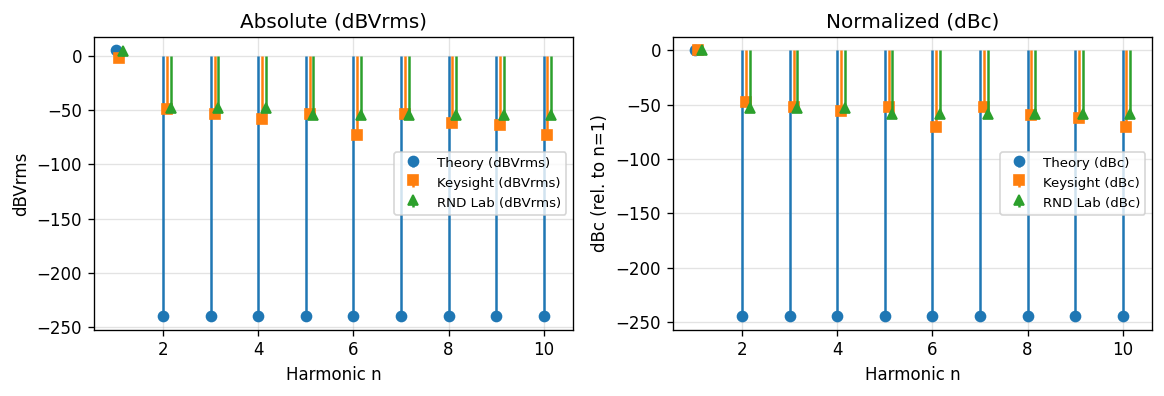

,n,theory_dBVrms,k_dBVrms,r_dBVrms,k_err_dB,r_err_dB
0,1.00,4.95,-2.10,4.53,-7.05,-0.41
1,2.00,—,-49.49,-48.16,190.51,191.84
2,3.00,—,-54.04,-48.16,185.96,191.84
3,4.00,—,-58.37,-48.16,181.63,191.84
4,5.00,—,-54.04,-54.18,185.96,185.82
5,6.00,—,-72.79,-54.18,167.21,185.82
6,7.00,—,-54.04,-54.18,185.96,185.82
7,8.00,—,-61.77,-54.18,178.23,185.82
8,9.00,—,-64.15,-54.18,175.85,185.82
9,10.00,—,-72.79,-54.18,167.21,185.82


,n,theory_dBc,k_dBc,r_dBc,k_err_dBc,r_err_dBc
0,1.00,0.00,0.00,0.00,0.00,0.00
1,2.00,—,-47.38,-52.70,197.56,192.25
2,3.00,—,-51.93,-52.70,193.02,192.25
3,4.00,—,-56.27,-52.70,188.68,192.25
4,5.00,—,-51.93,-58.72,193.02,186.23
5,6.00,—,-70.68,-58.72,174.26,186.23
6,7.00,—,-51.93,-58.72,193.02,186.23
7,8.00,—,-59.67,-58.72,185.28,186.23
8,9.00,—,-62.05,-58.72,182.90,186.23
9,10.00,—,-70.68,-58.72,174.26,186.23


In [169]:
# ---------- Begin section (usage) ----------
display(HTML("<div class='pagebreak'></div>"))

# Optional: map your CSV filenames for both sources (edit if needed)
CSV_KEYSIGHT = {
    'saw': "trace_saw_fft.csv",
    'tri': "trace_triangle_fft.csv",
    'sin': "trace_sine_fft.csv",
}
CSV_RND = {
    'saw': "RND_lab_saw_fft.csv",        # <-- set to your actual RND sawtooth CSV
    'tri': "RND_lab_triangle_fft.csv",   # <-- set to your actual RND triangle CSV
    'sin': "RND_lab_sine_1khz_fft.csv",  # <-- set to your actual RND sine CSV
}

# ===== 4.1 Sawtooth =====
display(HTML("<h3>4.1 Sawtooth — Theory vs Keysight vs RND Lab</h3>"))
display(HTML("<div>Two-panel figure (absolute dBVrms and normalized dBc) and the matching tables.</div>"))

df_saw = compare_three_panel(
    CSV_KEYSIGHT['saw'],
    CSV_RND['saw'],
    waveform='saw',
    apply_rc_to_theory=False,
    title_prefix="Fig. 1. Sawtooth"
)

display(HTML(
    "<div class='figure-note'>Interpretation: All harmonics are present and decay ~1/n. "
    "Absolute levels can differ between devices or CSV exports, but after normalization (dBc) "
    "both sources follow the same 1/n slope as theory.</div>"
))

show_case_table_abs(
    df_saw,
    "Table 2a. Sawtooth — Theory vs Keysight vs RND Lab (absolute dBVrms)",
    preface_text="First ten harmonics at multiples of 1 kHz.",
    closing_text="Absolute levels can be offset between sources; see the Note on absolute scaling. "
                 "Values below the floor or not defined are shown as “—”."
)
show_case_table_rel(
    df_saw,
    "Table 2b. Sawtooth — Theory vs Keysight vs RND Lab (normalized dBc)",
    preface_text="Each trace is normalized to its own fundamental (n=1).",
    closing_text="After normalization, all traces follow the expected ~1/n slope."
)

# ===== 4.2 Triangle =====
display(HTML("<div class='pagebreak'></div>"))
display(HTML("<h3>4.2 Triangle — Theory vs Keysight vs RND Lab</h3>"))
display(HTML("<div>Two-panel figure (absolute dBVrms and normalized dBc) and the matching tables.</div>"))

df_tri = compare_three_panel(
    CSV_KEYSIGHT['tri'],
    CSV_RND['tri'],
    waveform='tri',
    apply_rc_to_theory=False,
    title_prefix="Fig. 2. Triangle"
)

display(HTML(
    "<div class='figure-note'>Interpretation: Only odd harmonics appear and they decay ~1/n^2. "
    "Even harmonics are near the noise floor as theory predicts. In dBc, both sources show the same "
    "odd-harmonic envelope.</div>"
))

show_case_table_abs(
    df_tri,
    "Table 3a. Triangle — Theory vs Keysight vs RND Lab (absolute dBVrms)",
    preface_text="Only odd harmonics are predicted by theory; even-n entries should be at the floor.",
    closing_text="Entries below the floor or not defined are shown as “—”. Absolute offsets can occur; "
                 "see the Note on absolute scaling."
)
show_case_table_rel(
    df_tri,
    "Table 3b. Triangle — Theory vs Keysight vs RND Lab (normalized dBc)",
    preface_text="Normalization to n=1 focuses on the odd-harmonic envelope.",
    closing_text="Odd harmonics follow the expected ~1/n^2 slope; even-n entries are near the floor and shown as “—”."
)

# ===== 4.3 Sine =====
display(HTML("<div class='pagebreak'></div>"))
display(HTML("<h3>4.3 Sine — Theory vs Keysight vs RND Lab</h3>"))
display(HTML("<div>Two-panel figure (absolute dBVrms and normalized dBc) and the matching tables.</div>"))

df_sin = compare_three_panel(
    CSV_KEYSIGHT['sin'],
    CSV_RND['sin'],
    waveform='sin',
    apply_rc_to_theory=False,
    title_prefix="Fig. 3. Sine"
)

display(HTML(
    "<div class='figure-note'>Interpretation: The fundamental dominates, as theory predicts. "
    "Higher orders (n>1) are far below the fundamental (leakage, small distortion, noise). "
    "In dBc, both sources keep harmonics well below 0 dBc.</div>"
))

show_case_table_abs(
    df_sin,
    "Table 4a. Sine — Theory vs Keysight vs RND Lab (absolute dBVrms)",
    preface_text="Ideally only the fundamental is present; higher orders indicate leakage/distortion.",
    closing_text="For n>1, theory is exactly 0, so a dB error vs 0 is not defined. Such entries are shown as “—”. "
                 "Absolute offsets can occur; see the Note on absolute scaling."
)
show_case_table_rel(
    df_sin,
    "Table 4b. Sine — Theory vs Keysight vs RND Lab (normalized dBc)",
    preface_text="Normalization to n=1 highlights relative distortion products.",
    closing_text="Higher orders remain far below 0 dBc. Entries below the floor are shown as “—”."
)


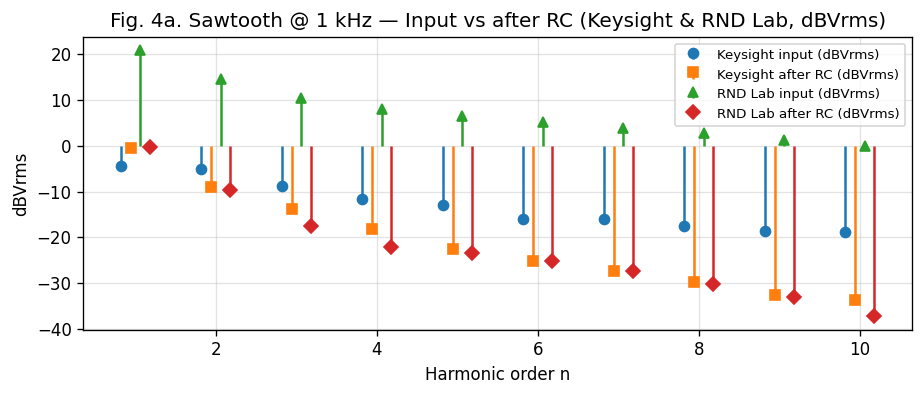

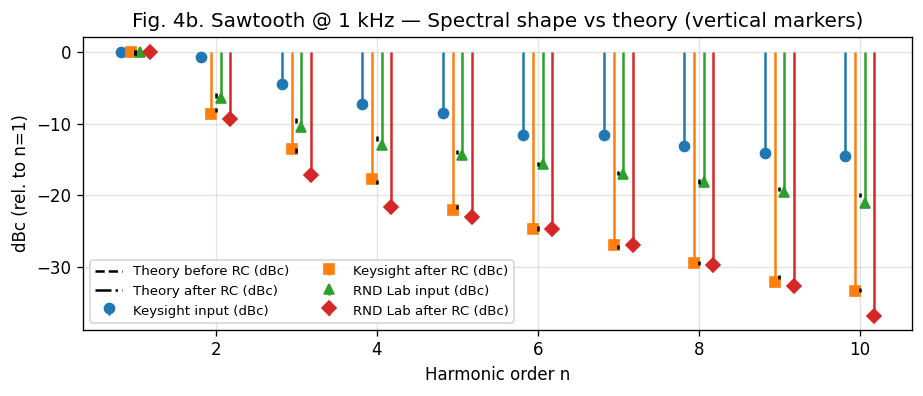

,n,K_in_dBV,K_out_dBV,K_atten_dB,T_pre_dBV,T_post_dBV,T_atten_dB
0,1.00,-4.48,-0.42,4.07,1.03,0.04,-0.98
1,2.00,-5.12,-9.06,-3.93,-4.99,-8.04,-3.04
2,3.00,-8.85,-13.89,-5.04,-8.52,-13.68,-5.17
3,4.00,-11.71,-18.20,-6.49,-11.02,-18.06,-7.04
4,5.00,-12.99,-22.48,-9.49,-12.95,-21.62,-8.66
5,6.00,-16.04,-25.09,-9.05,-14.54,-24.60,-10.06
6,7.00,-16.07,-27.34,-11.27,-15.88,-27.16,-11.29
7,8.00,-17.51,-29.84,-12.33,-17.04,-29.40,-12.37
8,9.00,-18.61,-32.60,-13.99,-18.06,-31.40,-13.34
9,10.00,-18.93,-33.76,-14.83,-18.97,-33.19,-14.22


,n,R_in_dBV,R_out_dBV,R_atten_dB,T_pre_dBV,T_post_dBV,T_atten_dB
0,1.00,20.89,-0.35,-21.24,1.03,0.04,-0.98
1,2.00,14.59,-9.65,-24.24,-4.99,-8.04,-3.04
2,3.00,10.47,-17.54,-28.01,-8.52,-13.68,-5.17
3,4.00,7.96,-22.04,-30.00,-11.02,-18.06,-7.04
4,5.00,6.48,-23.43,-29.91,-12.95,-21.62,-8.66
5,6.00,5.23,-25.09,-30.32,-14.54,-24.60,-10.06
6,7.00,3.93,-27.34,-31.27,-15.88,-27.16,-11.29
7,8.00,2.72,-30.10,-32.82,-17.04,-29.40,-12.37
8,9.00,1.30,-32.97,-34.28,-18.06,-31.40,-13.34
9,10.00,-0.12,-37.28,-37.16,-18.97,-33.19,-14.22


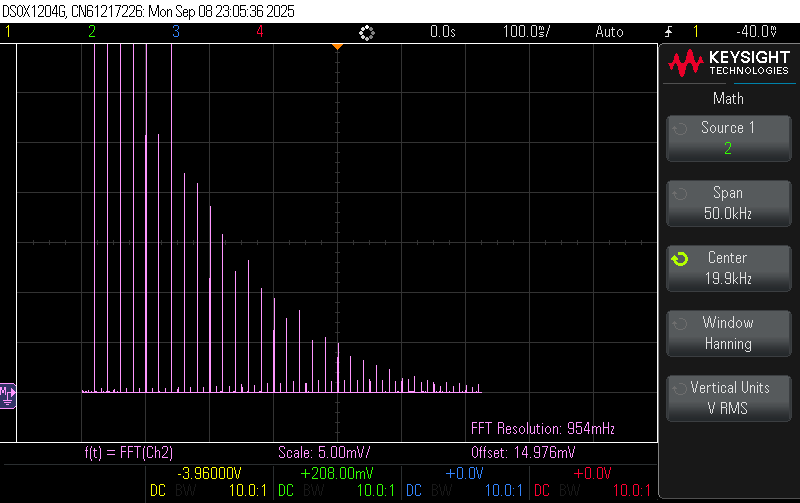

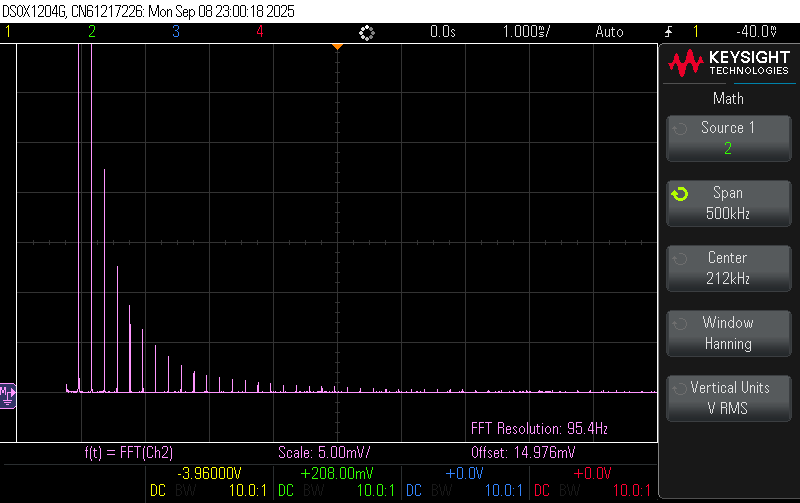

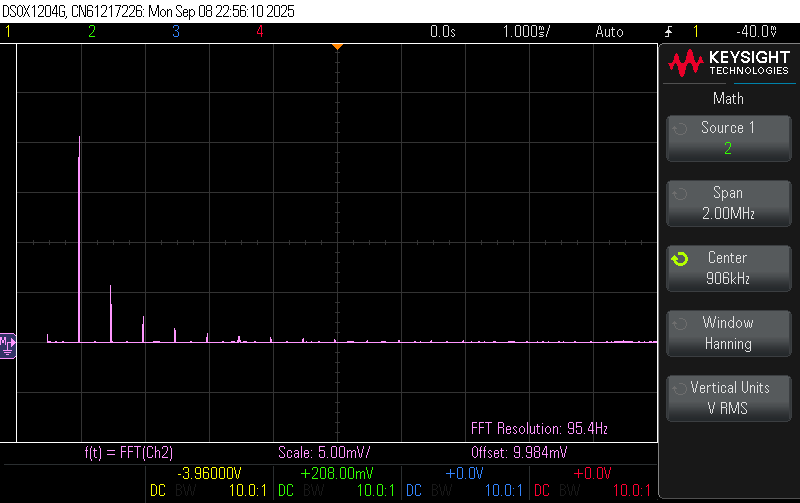

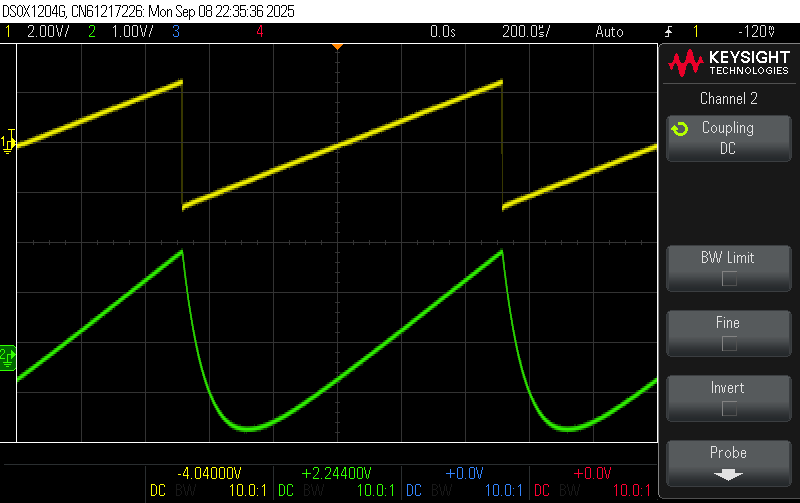

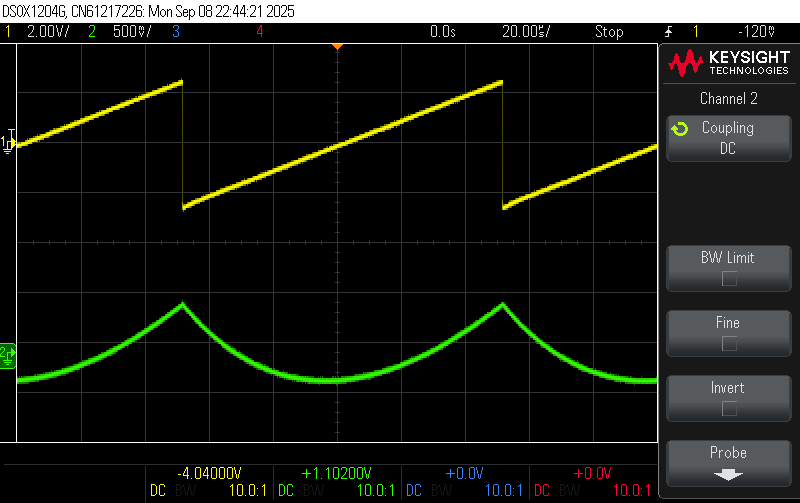

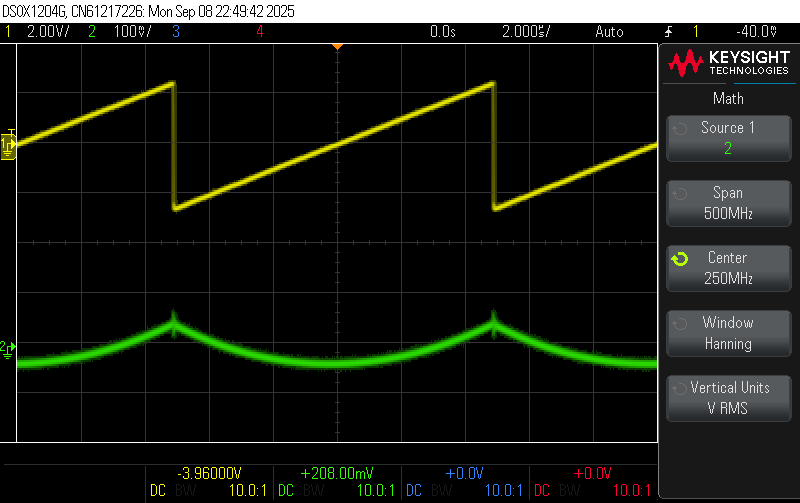

In [170]:
# ===== 4.4 RC unified =====
display(HTML("<div class='pagebreak'></div>"))
display(HTML("<h3>4.4 RC filter</h3>"))
display(HTML("<div>Four traces for input vs after RC (dBVrms & dBc) for both sources. "
             "Theory is shown as vertical markers in dBc. Tables include measured attenuation and theory.</div>"))

# --- 4.4.2 BEFORE vs AFTER RC (both sources in SAME plots) + THEORY overlays ---

def build_cmp_df(in_csv, out_csv):
    """
    Load spectra (Vrms -> dBVrms), pick harmonics, compute per-trace dBc and attenuation (after - before).
    Returns columns: n, in_dBV, out_dBV, in_dBc, out_dBc, atten_dB
    """
    spec_in  = read_scope_fft_vrms(in_csv)
    spec_out = read_scope_fft_vrms(out_csv)

    meas_in  = pick_harmonics(spec_in,  n_max=N_HARM, col='dBVrms').rename(columns={'dBVrms':'in_dBV'})
    meas_out = pick_harmonics(spec_out, n_max=N_HARM, col='dBVrms').rename(columns={'dBVrms':'out_dBV'})
    df = pd.merge(meas_in[['n','in_dBV']], meas_out[['n','out_dBV']], on='n', how='inner').sort_values('n')

    # Per-trace normalization (relative to n=1) → dBc
    df['in_dBc']  = to_dBc(df['n'], df['in_dBV'])
    df['out_dBc'] = to_dBc(df['n'], df['out_dBV'])

    # Attenuation (after - before) in dB
    df['atten_dB'] = df['out_dBV'] - df['in_dBV']
    return df.reset_index(drop=True)

# ---- File names: edit to your actual CSVs (input vs after RC) ----
# Keysight @ 1 kHz sawtooth
ks = build_cmp_df("trace_saw_fft.csv",            "rc_fft_1khz.csv")
# RND Lab @ 1 kHz sawtooth
rn = build_cmp_df("RND_lab_saw_fft.csv",          "RND_lab_saw_1khz_fft_RC.csv")

# Theory (before RC and after RC) for sawtooth
theo_pre  = theory_df("saw", apply_rc=False, n_max=N_HARM)[['n','theory_dBVrms','theory_dBc']].rename(
    columns={'theory_dBVrms':'T_pre_dBV',  'theory_dBc':'theory_pre_dBc'}
)
theo_post = theory_df("saw", apply_rc=True,  n_max=N_HARM)[['n','theory_dBVrms','theory_dBc']].rename(
    columns={'theory_dBVrms':'T_post_dBV', 'theory_dBc':'theory_post_dBc'}
)
theo = theo_pre.merge(theo_post, on='n', how='inner').sort_values('n').reset_index(drop=True)

# Use harmonic orders from data (assumes same n set across frames)
n = ks['n'].values

# -------------------- PLOTS --------------------

# (A) Absolute dBVrms overlay
fig, ax = plt.subplots(figsize=(7.8, 3.4))
ax.stem(n-0.18, ks['in_dBV'],  linefmt='C0-', markerfmt='C0o', basefmt=' ', label='Keysight input (dBVrms)')
ax.stem(n-0.06, ks['out_dBV'], linefmt='C1-', markerfmt='C1s', basefmt=' ', label='Keysight after RC (dBVrms)')
ax.stem(n+0.06, rn['in_dBV'],  linefmt='C2-', markerfmt='C2^', basefmt=' ', label='RND Lab input (dBVrms)')
ax.stem(n+0.18, rn['out_dBV'], linefmt='C3-', markerfmt='C3D', basefmt=' ', label='RND Lab after RC (dBVrms)')
ax.set_xlabel('Harmonic order n'); ax.set_ylabel('dBVrms')
ax.set_title('Fig. 4a. Sawtooth @ 1 kHz — Input vs after RC (Keysight & RND Lab, dBVrms)')
ax.grid(alpha=0.35); ax.legend(fontsize=8)
fig.tight_layout(); plt.show()
caption("Fig. 4a. Four-trace overlay — input vs after RC for both sources. Vrms from CSV were converted to dBVrms here. "
        "Absolute levels can differ between sources/exports; the attenuation after RC is clear for all n.")

# (B) Normalized dBc overlay + THEORY markers
fig, ax = plt.subplots(figsize=(7.8, 3.4))
K_in_dBc, K_out_dBc = ks['in_dBc'].values, ks['out_dBc'].values
R_in_dBc, R_out_dBc = rn['in_dBc'].values, rn['out_dBc'].values

ax.stem(n-0.18, K_in_dBc,  linefmt='C0-', markerfmt='C0o', basefmt=' ', label='Keysight input (dBc)')
ax.stem(n-0.06, K_out_dBc, linefmt='C1-', markerfmt='C1s', basefmt=' ', label='Keysight after RC (dBc)')
ax.stem(n+0.06, R_in_dBc,  linefmt='C2-', markerfmt='C2^', basefmt=' ', label='RND Lab input (dBc)')
ax.stem(n+0.18, R_out_dBc, linefmt='C3-', markerfmt='C3D', basefmt=' ', label='RND Lab after RC (dBc)')

def theory_ticks(xn, yvals, height=0.6, **kwargs):
    ax.vlines(xn, ymin=yvals-height/2, ymax=yvals+height/2, **kwargs)

theory_ticks(theo['n'].values, theo['theory_pre_dBc'].values,  0.6, colors='k', linestyles='dashed',  label='Theory before RC (dBc)')
theory_ticks(theo['n'].values, theo['theory_post_dBc'].values, 0.6, colors='k', linestyles='dashdot', label='Theory after RC (dBc)')

ax.set_xlabel('Harmonic order n'); ax.set_ylabel('dBc (rel. to n=1)')
ax.set_title('Fig. 4b. Sawtooth @ 1 kHz — Spectral shape vs theory (vertical markers)')
ax.grid(alpha=0.35); ax.legend(fontsize=8, ncol=2)
fig.tight_layout(); plt.show()
caption("Fig. 4b. Normalized spectra — Keysight & RND Lab, input vs after RC. "
        "Dashed ticks = theoretical unfiltered harmonics; dash-dot = theoretical after RC (|Fourier| · |H|). "
        "Both sources follow the expected ~1/n slope; after RC the lines drop by ~20 dB/decade.")

# -------------------- TABLES --------------------

# Build combined attenuation DataFrame
att = (pd.DataFrame({'n': n})
       .merge(ks[['n','in_dBV','out_dBV','atten_dB']].rename(columns={
           'in_dBV':'K_in_dBV','out_dBV':'K_out_dBV','atten_dB':'K_atten_dB'
       }), on='n', how='left')
       .merge(rn[['n','in_dBV','out_dBV','atten_dB']].rename(columns={
           'in_dBV':'R_in_dBV','out_dBV':'R_out_dBV','atten_dB':'R_atten_dB'
       }), on='n', how='left')
       .merge(theo[['n','T_pre_dBV','T_post_dBV']], on='n', how='left')
       .sort_values('n').reset_index(drop=True))

# Theoretical attenuation: Δ = post - pre
att['T_atten_dB'] = att['T_post_dBV'] - att['T_pre_dBV']

# Helper to show tables with “—” for very low/undefined cells (requires _format_table_for_display from TOP cell)
keysight_tbl = att[['n','K_in_dBV','K_out_dBV','K_atten_dB','T_pre_dBV','T_post_dBV','T_atten_dB']]
display(HTML("<div class='caption' style='font-weight:600'>Table 5a. Sawtooth @ 1 kHz — Keysight before vs after RC (dBVrms & ΔdB)</div>"))
display(HTML("<div class='figure-note'>Measured input/after/Δ for Keysight, plus theoretical before/after and theoretical Δ.</div>"))
try:
    display(_format_table_for_display(keysight_tbl.round(2)))
except NameError:
    display(keysight_tbl.round(2))  # fallback if helper not defined

rnd_tbl = att[['n','R_in_dBV','R_out_dBV','R_atten_dB','T_pre_dBV','T_post_dBV','T_atten_dB']]
display(HTML("<div class='caption' style='font-weight:600'>Table 5b. Sawtooth @ 1 kHz — RND Lab before vs after RC (dBVrms & ΔdB)</div>"))
display(HTML("<div class='figure-note'>Measured input/after/Δ for RND Lab, plus theoretical before/after and theoretical Δ.</div>"))
try:
    display(_format_table_for_display(rnd_tbl.round(2)))
except NameError:
    display(rnd_tbl.round(2))  # fallback

display(HTML("<div class='figure-note'>Measured attenuation grows with harmonic order (≈ −20 dB/decade). "
             "The theoretical Δ is 20·log10|H(j·2π·n·F0)| and agrees well with the data.</div>"))

# --- 4.4.3 Frequency response (FFT) ---
display(HTML("<div class='pagebreak'></div>"))
display(HTML("<div class='keep-with-next nobreak'><b>FFT results at 1 kHz, 10 kHz, and 100 kHz:</b> "
             "higher frequencies are reduced more by the RC filter.</div>"))

IMG_WIDTH = 360
for cap, path in [
    ("Fig. 5. RC near 1 kHz (FFT)",   "rc_fft_1khz.png"),
    ("Fig. 6. RC near 10 kHz (FFT)",  "rc_fft_10khz.png"),
    ("Fig. 7. RC near 100 kHz (FFT)", "rc_fft_100khz.png"),
]:
    try:
        display(Image(filename=path, embed=True, width=IMG_WIDTH))
        caption(cap)
    except Exception as e:
        display(HTML(f"<div style='color:#c00'>Missing image: {path} ({e})</div>"))

display(HTML("<div class='figure-note'>At 10 kHz (≈5× the cutoff) the fundamental has dropped by >10 dB and most harmonics are gone. "
             "At 100 kHz (≈50× the cutoff) the spectrum is near the noise floor. "
             "This matches the expected −20 dB/decade behavior.</div>"))

# --- 4.4.4 Time-domain snapshots ---
display(HTML("<div class='pagebreak'></div>"))
display(HTML("<div class='keep-with-next nobreak'><b>Time-domain snapshots at 1 kHz, 10 kHz, and 100 kHz:</b> "
             "as more harmonics are filtered out, the waveform becomes smoother.</div>"))

for cap, path in [
    ("Fig. 8. 1 kHz time-domain (RC output)",    "rc_signal.png"),
    ("Fig. 9. 10 kHz time-domain (RC output)",   "rc_10khz.png"),
    ("Fig. 10. 100 kHz time-domain (RC output)", "rc_100khz.png"),
]:
    try:
        display(Image(filename=path, embed=True, width=IMG_WIDTH))
        caption(cap)
    except Exception as e:
        display(HTML(f"<div style='color:#c00'>Missing image: {path} ({e})</div>"))

display(HTML("<div class='figure-note keep-with-next nobreak'>"
             "At 1 kHz the sawtooth is still visible with rounded edges. "
             "At 10 kHz the output is close to a sine. "
             "At 100 kHz the output is almost flat. "
             "These changes agree with the FFT results and confirm the expected low-pass behavior.</div>"))


<div class="pagebreak"></div>

## Discussion

### Sawtooth, Triangle, and Sine (Sections 4.1–4.3)  
The measurements matched the main predictions from Fourier theory:

- **Sawtooth:** All harmonics were present and went down about as \(1/n\). Both Keysight and RND followed this trend, but higher orders were weaker due to FFT limits and generator limits. The dBc plots made the slope easy to see.  

- **Triangle:** Only odd harmonics appeared and went down close to \(1/n^2\). Even harmonics stayed near the noise floor. Higher orders fell a bit faster than theory, showing extra attenuation.  

- **Sine:** Only the fundamental was seen. Higher harmonics were at the noise floor, with a few small peaks from FFT leakage. This shows low distortion for both sources.  

### RC Filter (Section 4.4)  
The RC circuit worked as a first-order low-pass:

- The cutoff was about 2 kHz and matched the calculated value.  
- Harmonics dropped by ≈ −20 dB per decade.  
- Time-domain plots showed smoother waveforms.  
- Small errors came from normal tolerances, extra capacitance, FFT limits, and the Hann window.  

### Source Comparison (Sections 4.1–4.4)  
The two generators showed small but clear differences:

- **Before RC:** RND matched theory more closely; Keysight deviated more.  
- **After RC:** Keysight moved closer to theory; RND fell below it at higher harmonics.  

This is because Keysight produced extra high-order content that the RC filter removed, while RND already made a cleaner sawtooth, so filtering reduced its higher harmonics more. Cable effects and FFT bin alignment also caused small shifts.  

### Summary  
Theory and measurement agreed within a few dB. Each waveform showed the expected harmonic pattern, and the RC filter followed the −20 dB/decade model. The small differences between Keysight and RND explain most of the remaining gaps. The lab showed that Fourier series and RC filter theory describe the measured spectra well in practice.


<div class="pagebreak"></div>

## Conclusions

The laboratory work confirmed the main predictions from Fourier theory and the expected behavior of a first-order RC filter.

**Key findings:**  
- Harmonic amplitudes decayed as theory predicts: \(1/n\) for the sawtooth, \(1/n^2\) for the triangle, and only the fundamental for the sine.  
- The RC filter introduced a roll-off of about −20 dB/decade beyond the cutoff frequency (~2 kHz), consistent with the calculated value.  
- Both signal sources produced nearly identical fundamentals. The RND generator retained stronger higher-order harmonics, while the Keysight source produced smoother signals.  
- Deviations of only a few dB arose from normal limitations: FFT resolution, windowing effects, generator design, and component tolerances.  
- Using the oscilloscope FFT together with Python analysis proved reliable for extracting harmonics and comparing with theory.  

**Conclusion:**  
Fourier series and RC filter theory described the measured spectra very well under laboratory conditions. The small differences observed were consistent with expected measurement uncertainties rather than flaws in the theory.

<div class="pagebreak"></div>


## References

[1] H. Hallenberg, *Signalbehandling och kommunikationssystem*. Göteborg, Sweden: Yrgo, 2021.  

[2] Yrgo, *ELA24 – Laboration: Frekvensanalys (Lab PM)*. Göteborg, Sweden: Yrgo, 2025.  

[3] Yrgo, *ELA24 – Ledning Fourierlabben*. Göteborg, Sweden: Yrgo, 2025.  

[4] Keysight Technologies, *InfiniiVision 1000-X Series Oscilloscopes User’s Guide: FFT Spectral Analysis (dBVrms)*. [Online]. Available: https://www.ece.ucdavis.edu/~lewis/112/scope_user_guide.pdf. [Accessed: Sep. 19, 2025].

[5] Wikipedia, "Low-pass filter – RC filter." [Online]. Available: https://en.wikipedia.org/wiki/Low-pass_filter. [Accessed: Sep. 19, 2025].  

[6] Keysight Technologies, *InfiniiVision 1000-X Series Oscilloscopes User’s Guide (FFT scaling, window functions)*. Keysight Technologies, 2019. [Online]. Available: https://www.ece.ucdavis.edu/~lewis/112/scope_user_guide.pdf. [Accessed: Sep. 19, 2025].  

[7] Keysight Technologies, *BenchVue Software (BV0000A) Technical Overview*, Document No. 5991-3850EN. [Online]. Available: https://www.keysight.com/us/en/assets/7018-04245/technical-overviews/5991-3850.pdf. [Accessed: Sep. 19, 2025].
 

[8] RND Lab, *Function Generator Datasheet, RND 360-00002*. RND Lab, 2020. [Online]. Available: https://media.distrelec.com/Web/Downloads/_t/ds/RND_360-00002_eng_tds.pdf. [Accessed: Sep. 19, 2025].  

[9] RND Lab, *Function Generator Quick Guide, RND 360-00002*. RND Lab, 2020. [Online]. Available: https://www.elfa.se/en/arbitrary-waveform-generator-2x-35mhz-de-fr-type-cee-plug-rnd-rnd-360-00002/p/30219801. [Accessed: Sep. 19, 2025].  


<div class="pagebreak"></div>

## Appendix A: Figures

Appendix A contains oscilloscope screenshots of input and RC‑filtered signals.

### Time-domain waveforms (Input signals)

<div class="keep-together" style="display:flex; flex-wrap:wrap; gap:16px; align-items:flex-start; margin:0.3em 0 1.2em 0;">
  <div style="flex:1 1 30%"><div class="caption" style="margin:0.35em 0">Fig. A1. Sawtooth input (time domain)</div><img src="saw_signal.png" alt="Fig. A1. Sawtooth input" width="320"/></div>
  <div style="flex:1 1 30%"><div class="caption" style="margin:0.35em 0">Fig. A2. Triangle input (time domain)</div><img src="triangle_signal.png" alt="Fig. A2. Triangle input" width="320"/></div>
  <div style="flex:1 1 30%"><div class="caption" style="margin:0.35em 0">Fig. A3. Sine input (time domain)</div><img src="sine_signal.png" alt="Fig. A3. Sine input" width="320"/></div>
</div>

### FFT spectra (Measured)

<div class="keep-together" style="display:flex; flex-wrap:wrap; gap:16px; align-items:flex-start; margin:0.3em 0 1.2em 0;">
  <div style="flex:1 1 30%"><div class="caption" style="margin:0.35em 0">Fig. A4. Sawtooth input (FFT)</div><img src="saw_fft.png" alt="Fig. A4. Sawtooth FFT" width="320"/></div>
  <div style="flex:1 1 30%"><div class="caption" style="margin:0.35em 0">Fig. A5. Triangle input (FFT)</div><img src="triangle_fft.png" alt="Fig. A5. Triangle FFT" width="320"/></div>
  <div style="flex:1 1 30%"><div class="caption" style="margin:0.35em 0">Fig. A6. Sine input (FFT)</div><img src="sine_fft.png" alt="Fig. A6. Sine FFT" width="320"/></div>
</div>

> Note: If an image fails to render in exported PDF, ensure the files are alongside the notebook, or rely on embedded display outputs in the main RC section.
<div class="pagebreak"></div>

## Appendix B: Python math used

The minimal Python used to compute theoretical quantities referenced in the Results is included below for completeness.

```python
# Core helpers (theory + CSV parsing + plotting) moved here for completeness
# ---- Parameters (match main analysis) ----
F0      = 1000.0          # [Hz] fundamental
VPP     = 5.0             # [Vpp] generator-level for theory
A       = VPP/2.0         # [Vpeak]
N_HARM  = 10              # compare first N harmonics
R_meas, C_meas = 8140.0, 9.853e-9
FC      = 1.0/(2*np.pi*R_meas*C_meas)

def vrms_to_dBVrms(vrms, floor=1e-12):
    v = np.maximum(np.asarray(vrms, float), floor)
    return 20.0*np.log10(v)


def rc_mag(f, fc=FC):
    f = np.asarray(f, float)
    return 1.0/np.sqrt(1.0 + (f/fc)**2)


def sawtooth_dBVrms(n, A=A):
    n = np.asarray(n, int)
    vpk = 2.0*A/(np.pi*np.maximum(n,1))
    vrms = vpk/np.sqrt(2.0)
    return vrms_to_dBVrms(vrms)


def triangle_dBVrms(n, A=A):
    n = np.asarray(n, int)
    vrms = np.zeros_like(n, float)
    odd = (n % 2 == 1)
    vpk_odd = 8.0*A/(np.pi**2 * np.maximum(n[odd],1)**2)
    vrms[odd] = vpk_odd/np.sqrt(2.0)
    dB = vrms_to_dBVrms(vrms)
    dB[~odd] = np.nan
    return dB


def sine_dBVrms(n, A=A):
    n = np.asarray(n, int)
    vrms = np.zeros_like(n, float)
    vrms[n == 1] = A/np.sqrt(2.0)
    dB = vrms_to_dBVrms(vrms)
    dB[n != 1] = np.nan
    return dB
```